In [1]:
# import the modules

import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
#For some Statistics
from scipy.stats import norm, skew
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Define the following functions as per the description, so that they can be called later to perform the tasks.

### Read the dataset. Take a look at the dataset. 

* Check the data types present in the dataframe.
* Call the num_and_cat_columns() with train as the parameter and store the results.
* Are there any missing values? Are there any Outliers? How do you want to treat them?


In [2]:
# Code starts here

data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')


# Code ends here

In [3]:
data_train.shape

(567103, 13)

In [4]:
data_test.shape

(177220, 12)

In [5]:
data_test.head()

,Id,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Employee Identifier,Retirement,Health and Dental,Other Benefits
0,0,Calendar,2017,"Public Works, Transportation & Commerce",NaN,"Electrical Workers, Local 6",Journeyman Trade,Electrical Line Worker,8549078,$0.0,$13051.16,$0.0
1,1,Calendar,2019,Public Protection,NaN,"SEIU, Local 1021, Misc",Correction & Detention,"Counselor, Juvenile Hall PERS",8546443,$21487.97,$28361.72,$753.13
2,2,Fiscal,2018,Community Health,NaN,"SEIU, Local 1021, Misc",Dietary & Food,Food Service Worker,8512207,$12468.31,$13863.98,$4464.84
3,3,Fiscal,2018,Public Protection,NaN,"SEIU, Local 1021, Misc",Correction & Detention,"Counselor, Juvenile Hall SFERS",8542154,$0.0,$0.0,$1787.63
4,4,Fiscal,2017,Public Protection,POL Police,"SEIU - Miscellaneous, Local 1021",Protection & Apprehension,Police Cadet,48828,$4489.2,$8003.53,$2015.35


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567103 entries, 0 to 567102
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   567103 non-null  int64  
 1   Year Type            567103 non-null  object 
 2   Year                 567103 non-null  int64  
 3   Organization Group   567103 non-null  object 
 4   Department           272038 non-null  object 
 5   Union                566758 non-null  object 
 6   Job Family           567103 non-null  object 
 7   Job                  567100 non-null  object 
 8   Employee Identifier  567103 non-null  int64  
 9   Retirement           567103 non-null  object 
 10  Health and Dental    567103 non-null  object 
 11  Other Benefits       567103 non-null  object 
 12  Total Compensation   567103 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 56.2+ MB


In [7]:
categorical_columns = [c for c in data_train.columns 
                       if data_train[c].dtype.name == 'object']
numerical_columns = [c for c in data_train.columns 
                     if data_train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['Year Type', 'Organization Group', 'Department', 'Union', 'Job Family', 'Job', 'Retirement', 'Health and Dental', 'Other Benefits']
numerical_columns: ['Id', 'Year', 'Employee Identifier', 'Total Compensation']


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
-Clean the data and apply some data preprocessing techniques



array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Employee Identifier'}>,
        <AxesSubplot:title={'center':'Total Compensation'}>]],
      dtype=object)

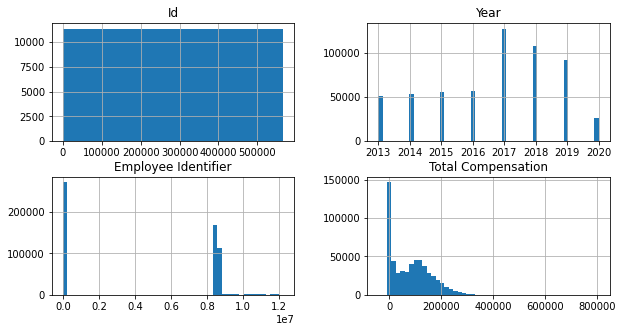

In [8]:
data_train.hist(bins=50, figsize=(10,5))

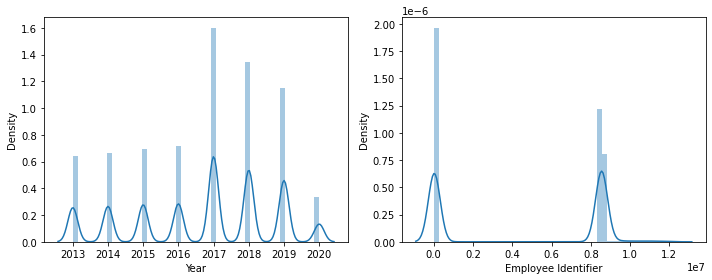

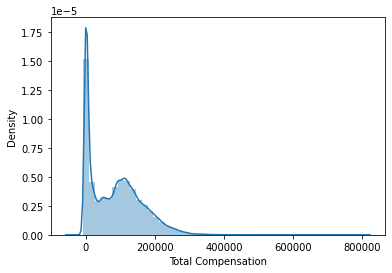

In [9]:
# Code starts here

num_cols = ['Year', 'Employee Identifier', 'Total Compensation']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(data_train[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(data_train[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(data_train[num_cols[i]], hist=True, kde=True)

# Have a look at the features, check the type where any currency is involved. 
# We have columns with compensations stored in form of strings. We need to clean it and convert this to numeric. 
# Call the clean_dollar() to do the same. 




In [10]:
data_train.corr()

,Id,Year,Employee Identifier,Total Compensation
Id,1.000000,0.002284,0.001306,0.001243
Year,0.002284,1.000000,0.807132,-0.050990
Employee Identifier,0.001306,0.807132,1.000000,-0.162666
Total Compensation,0.001243,-0.050990,-0.162666,1.000000


In [11]:
data_train['Retirement']=data_train['Retirement'].str.replace('$','')
data_train['Retirement'] = data_train['Retirement'].astype(float)

In [12]:
data_train['Health and Dental']=data_train['Health and Dental'].str.replace('$','')
data_train['Health and Dental'] = data_train['Health and Dental'].astype(float)

In [13]:
data_train['Other Benefits']=data_train['Other Benefits'].str.replace('$','')
data_train['Other Benefits'] = data_train['Other Benefits'].astype(float)

In [14]:
categorical_columns = [c for c in data_train.columns 
                       if data_train[c].dtype.name == 'object']
numerical_columns = [c for c in data_train.columns 
                     if data_train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['Year Type', 'Organization Group', 'Department', 'Union', 'Job Family', 'Job']
numerical_columns: ['Id', 'Year', 'Employee Identifier', 'Retirement', 'Health and Dental', 'Other Benefits', 'Total Compensation']


In [15]:
data_train.corr()

,Id,Year,Employee Identifier,Retirement,Health and Dental,Other Benefits,Total Compensation
Id,1.000000,0.002284,0.001306,0.001240,0.003082,0.003113,0.001243
Year,0.002284,1.000000,0.807132,-0.094384,0.173500,-0.046828,-0.050990
Employee Identifier,0.001306,0.807132,1.000000,-0.191819,0.184418,-0.154439,-0.162666
Retirement,0.001240,-0.094384,-0.191819,1.000000,0.596254,0.740177,0.963019
Health and Dental,0.003082,0.173500,0.184418,0.596254,1.000000,0.455643,0.642519
Other Benefits,0.003113,-0.046828,-0.154439,0.740177,0.455643,1.000000,0.757083
Total Compensation,0.001243,-0.050990,-0.162666,0.963019,0.642519,0.757083,1.000000


In [16]:
#data_train['Organization Group'].value_counts()

In [17]:
#data_train['Department'].value_counts()

In [18]:
#data_train['Job Family'].value_counts()

In [19]:
#data_train['Job'].value_counts()

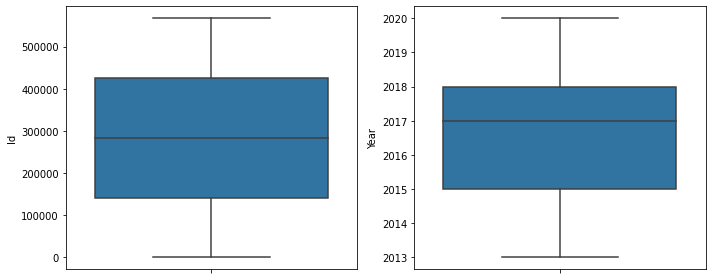

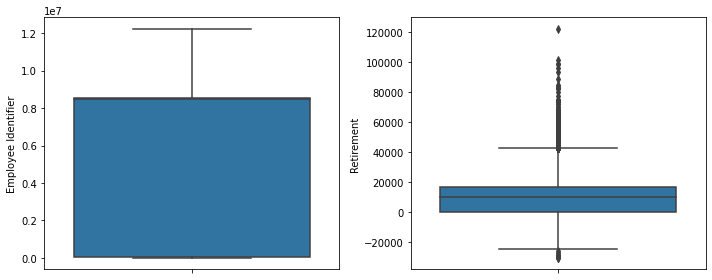

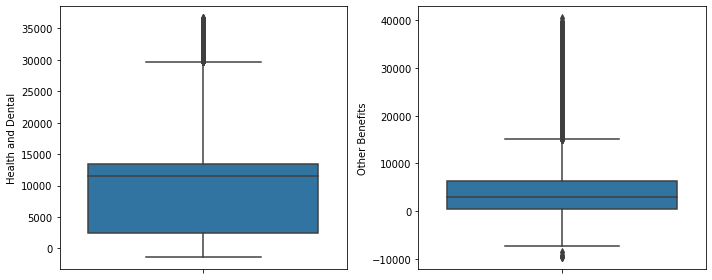

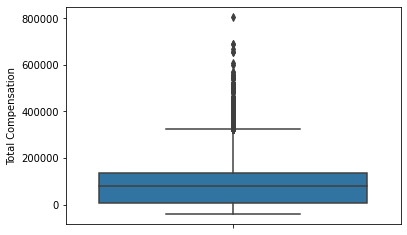

In [20]:
num_cols = ['Id', 'Year', 'Employee Identifier', 'Retirement', 'Health and Dental', 'Other Benefits', 'Total Compensation']
facet = None
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(facet, num_cols[i],data = data_train)
        plt.subplot(122)            
        sns.boxplot(facet, num_cols[i+1],data = data_train)
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(facet, num_cols[i],data = data_train)

<AxesSubplot:xlabel='count', ylabel='Organization Group'>

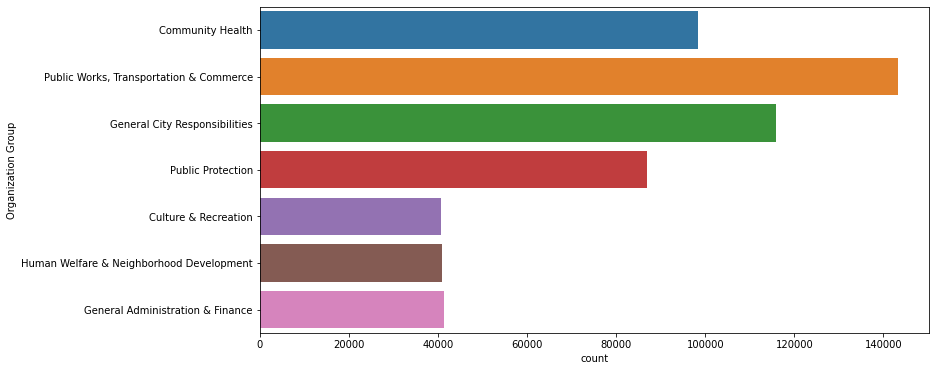

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(y='Organization Group', data=data_train)

In [22]:
#cols = ['Year', 'Employee Identifier', 'Retirement', 'Health and Dental', 'Other Benefits', 'Total Compensation']
#sns.pairplot(data_train[cols])

In [23]:
Q1 = data_train.quantile(0.25)
Q3 = data_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id                      283551.00
Year                         3.00
Employee Identifier    8526552.50
Retirement               16908.84
Health and Dental        10917.41
Other Benefits            5941.58
Total Compensation      126905.72
dtype: float64


In [24]:
data_train.shape

(567103, 13)

In [25]:
total = data_train.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data_train.isnull().sum(axis=0)/data_train.isnull().count(axis=0))*100).sort_values(ascending=False)

In [26]:
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
Department,295065,52.030231
Union,345,0.060836
Job,3,0.000529
Total Compensation,0,0.000000
Other Benefits,0,0.000000
Health and Dental,0,0.000000
Retirement,0,0.000000
Employee Identifier,0,0.000000
Job Family,0,0.000000
Organization Group,0,0.000000


In [27]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent')
mode_imputer.fit(data_train[['Job']])
data_train['Job'] = mode_imputer.transform(data_train[['Job']])
data_test['Job'] = mode_imputer.transform(data_test[['Job']])

In [28]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent')
mode_imputer.fit(data_train[['Union']])
data_train['Union'] = mode_imputer.transform(data_train[['Union']])
data_test['Union'] = mode_imputer.transform(data_test[['Union']])

In [29]:
total = data_train.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data_train.isnull().sum(axis=0)/data_train.isnull().count(axis=0))*100).sort_values(ascending=False)
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
Department,295065,52.030231
Total Compensation,0,0.000000
Other Benefits,0,0.000000
Health and Dental,0,0.000000
Retirement,0,0.000000
Employee Identifier,0,0.000000
Job,0,0.000000
Job Family,0,0.000000
Union,0,0.000000
Organization Group,0,0.000000


In [30]:
data_train.drop(['Id','Employee Identifier','Department'],1, inplace= True)

In [31]:
X=data_train.drop(['Total Compensation'], axis=1)
y=data_train['Total Compensation'].copy()

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
categorical_columns = [c for c in X_train.columns 
                       if X_train[c].dtype.name == 'object']

for column in categorical_columns:
    X_train[column]=X_train[column].astype('category').cat.codes
    
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453682 entries, 50624 to 305711
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year Type           453682 non-null  int8   
 1   Year                453682 non-null  int64  
 2   Organization Group  453682 non-null  int8   
 3   Union               453682 non-null  int8   
 4   Job Family          453682 non-null  int8   
 5   Job                 453682 non-null  int16  
 6   Retirement          453682 non-null  float64
 7   Health and Dental   453682 non-null  float64
 8   Other Benefits      453682 non-null  float64
dtypes: float64(3), int16(1), int64(1), int8(4)
memory usage: 19.9 MB
None


In [34]:
categorical_columns = [c for c in X_val.columns 
                       if X_val[c].dtype.name == 'object']
for column in categorical_columns:
    X_val[column]=X_val[column].astype('category').cat.codes
    
print(X_val.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113421 entries, 162234 to 31678
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year Type           113421 non-null  int8   
 1   Year                113421 non-null  int64  
 2   Organization Group  113421 non-null  int8   
 3   Union               113421 non-null  int8   
 4   Job Family          113421 non-null  int8   
 5   Job                 113421 non-null  int16  
 6   Retirement          113421 non-null  float64
 7   Health and Dental   113421 non-null  float64
 8   Other Benefits      113421 non-null  float64
dtypes: float64(3), int16(1), int64(1), int8(4)
memory usage: 5.0 MB
None


In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453682 entries, 50624 to 305711
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year Type           453682 non-null  int8   
 1   Year                453682 non-null  int64  
 2   Organization Group  453682 non-null  int8   
 3   Union               453682 non-null  int8   
 4   Job Family          453682 non-null  int8   
 5   Job                 453682 non-null  int16  
 6   Retirement          453682 non-null  float64
 7   Health and Dental   453682 non-null  float64
 8   Other Benefits      453682 non-null  float64
dtypes: float64(3), int16(1), int64(1), int8(4)
memory usage: 19.9 MB


In [36]:
# Check the distribution of certain columns you might find of interest. 
# This can be done by calling the plot_distribution(). 
# Apply some good transformation if required. Call transform_column() to do the same.



In [37]:
# Before we proceed with the model fitting, we need to get rid of the categorical columns.
# We can use One Hot Encoding or Label Encoding to convert the categorical columns to numeric.
#Call the encode_category() with the list of columns and the method of encoding to do the same.



In [38]:
# Now since we have encoded all the categorical columns, there shouldn't be any left in the data.
# Check the same by calling num_and_cat_columns()




### Model building

- Separate the features and target.
- Now let's come to the actual task, using linear regression, predict the `Total Compensation`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. Call the `fit_model()` with respective parameters.



In [39]:
# Code Starts here
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
r2_linreg = r2_score(y_val,y_pred_lr)
print("R2 for Linear Regression is:",r2_linreg)

# Code ends here

R2 for Linear Regression is: 0.9408487385287603


In [40]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_val)
lasso_r2 = r2_score(y_val, lasso_pred)
print("R2 for Lasso Regression is:",lasso_r2)

R2 for Lasso Regression is: 0.9408486890790015


In [41]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_val)
ridge_r2 = r2_score(y_val, ridge_pred)
print("R2 for Ridge Regression is:",ridge_r2)

R2 for Ridge Regression is: 0.940848738284945


In [42]:
polynomial_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
polynomial_model.fit(X_train,y_train)
y_pred_poly = polynomial_model.predict(X_val)
r2_poly = r2_score(y_val,y_pred_poly)
print("R2 for Polynomial Regression is:",r2_poly)

R2 for Polynomial Regression is: 0.9581302746615491


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [43]:
data_test.drop(['Employee Identifier','Department'],1, inplace= True)

In [44]:
data_test['Retirement']=data_test['Retirement'].str.replace('$','')
data_test['Retirement'] = data_test['Retirement'].astype(float)

In [45]:
data_test['Health and Dental']=data_test['Health and Dental'].str.replace('$','')
data_test['Health and Dental'] = data_test['Health and Dental'].astype(float)

In [46]:
data_test['Other Benefits']=data_test['Other Benefits'].str.replace('$','')
data_test['Other Benefits'] = data_test['Other Benefits'].astype(float)

In [47]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177220 entries, 0 to 177219
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  177220 non-null  int64  
 1   Year Type           177220 non-null  object 
 2   Year                177220 non-null  int64  
 3   Organization Group  177220 non-null  object 
 4   Union               177220 non-null  object 
 5   Job Family          177220 non-null  object 
 6   Job                 177220 non-null  object 
 7   Retirement          177220 non-null  float64
 8   Health and Dental   177220 non-null  float64
 9   Other Benefits      177220 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 13.5+ MB


In [48]:
categorical_columns = [c for c in data_test.columns 
                       if data_test[c].dtype.name == 'object']

for column in categorical_columns:
    data_test[column]=data_test[column].astype('category').cat.codes
    
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177220 entries, 0 to 177219
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  177220 non-null  int64  
 1   Year Type           177220 non-null  int8   
 2   Year                177220 non-null  int64  
 3   Organization Group  177220 non-null  int8   
 4   Union               177220 non-null  int8   
 5   Job Family          177220 non-null  int8   
 6   Job                 177220 non-null  int16  
 7   Retirement          177220 non-null  float64
 8   Health and Dental   177220 non-null  float64
 9   Other Benefits      177220 non-null  float64
dtypes: float64(3), int16(1), int64(2), int8(4)
memory usage: 7.8 MB
None


In [49]:

# Storing the id from the test file
id_ = data_test['Id']
data_test.drop(['Id'],1,inplace=True)
# Predict on the test data
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train, y_train)
y_pred_test =model.predict(data_test)
y_pred_test = y_pred_test.flatten()
print(y_pred_test)
# Create a sample submission file
final_submission = pd.DataFrame({'Id':id_,'Total Compensation':y_pred_test})
final_submission = final_submission.astype(int)
# Convert the sample submission file into a csv file
final_submission.to_csv('Final_submission.csv',index=False)

# Code ends here

[ 11238.90345436 122428.77731711  92164.69460326 ...  46732.82169229
  85299.2981723  111586.06888515]
